In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import pickle

In [45]:
df= pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [46]:
#
def brand(i):
    m=i.split()
    return m[0]
def model(i):
    m=i.split()
    return m[1]

In [47]:
df[df['km_driven']>800000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1243,Maruti Swift VXI BSIII,2009,250000,806599,Petrol,Dealer,Manual,First Owner


In [48]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.10)
    q3 = df_in[col_name].quantile(0.90)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


df= remove_outlier(df, 'km_driven')
df= remove_outlier(df, 'selling_price')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


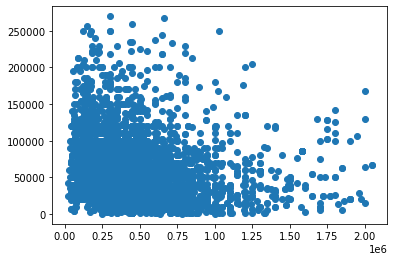

In [49]:
plt.scatter(df['selling_price'],df['km_driven'])

In [50]:
df['brand'] =  df['name'].apply(brand)
df['model'] =  df['name'].apply(model)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,i20
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,i20
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti,800
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai,Creta


In [51]:
df['brand'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Daewoo', 'MG', 'Force',
       'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

In [52]:
count=df.groupby(['brand']).count().reset_index()
count=count.sort_values('name',ascending=False).iloc[:10]

In [53]:
count

,brand,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,model
17,Maruti,1276,1276,1276,1276,1276,1276,1276,1276,1276
10,Hyundai,821,821,821,821,821,821,821,821,821
16,Mahindra,362,362,362,362,362,362,362,362,362
24,Tata,358,358,358,358,358,358,358,358,358
9,Honda,252,252,252,252,252,252,252,252,252
8,Ford,230,230,230,230,230,230,230,230,230
3,Chevrolet,187,187,187,187,187,187,187,187,187
25,Toyota,182,182,182,182,182,182,182,182,182
22,Renault,146,146,146,146,146,146,146,146,146
26,Volkswagen,106,106,106,106,106,106,106,106,106


C:\Users\Bharath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

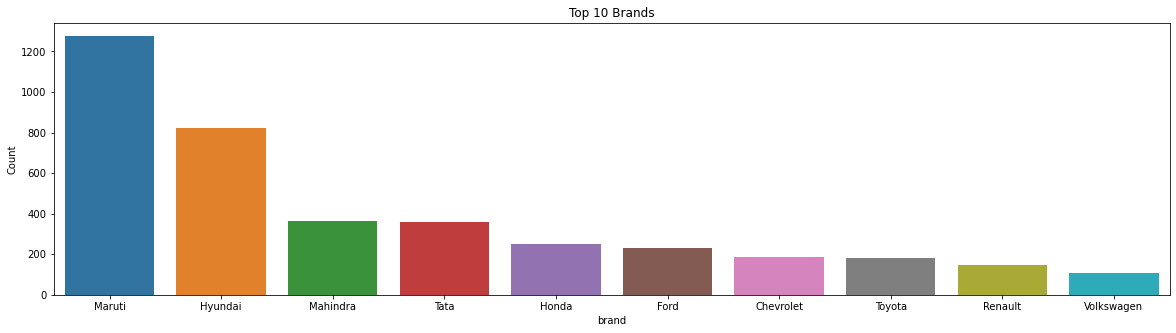

In [54]:
fig, ax= plt.subplots(figsize = (20,5))
ax=sns.barplot(count['brand'],count['name'])
plt.title('Top 10 Brands')
plt.ylabel("Count")

In [55]:
print('no of NA values:',df.isna().sum().sum())
print('no of NULL values:',df.isnull().sum().sum())


no of NA values: 0
no of NULL values: 0


In [56]:
df_new=df
df_new.drop(['name','model'],axis=1,inplace=True)
df_new

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai


In [57]:
df_new['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [58]:
df_new=  pd.get_dummies(df_new,drop_first=True)
df_new

,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,2007,60000,70000,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2007,135000,50000,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2012,600000,100000,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2017,250000,46000,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2014,450000,141000,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4336,2014,409999,80000,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4337,2009,110000,83000,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4338,2016,865000,90000,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [59]:
X= df_new.drop('selling_price',axis=True)
y= df_new['selling_price']

In [60]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)

In [61]:
score = []
def Model(model ):
    regg= model
   # regg.fit(Xtrain,ytrain)
    k=cross_val_score(regg,X,y,cv=5)
    score.append(k)

models=[LinearRegression,RandomForestRegressor,SVR,KNeighborsRegressor]
for i in models:
    Model(i())
score

[array([0.71531765, 0.69208965, 0.67387409, 0.62668222, 0.61284314]),
 array([0.80589848, 0.75395183, 0.77591952, 0.72179112, 0.65702829]),
 array([-0.09469498, -0.0557711 , -0.0792336 , -0.03139721, -0.10560515]),
 array([0.33119679, 0.32315819, 0.43990146, 0.28183479, 0.28872297])]

Regg_RF = RandomForestRegressor()

parm = {
    'n_estimators':[300,500],
    'max_features': ["sqrt", "log2"],
    'max_depth':[20,40,80,160],
    'criterion' :['squared_error']
}
RF_CV= GridSearchCV(Regg_RF,param_grid=parm,cv=3)
RF_CV.fit(Xtrain,ytrain)

RF_CV.best_params_

In [62]:
Regg_RF1 = RandomForestRegressor(n_estimators=10000,max_depth=20,max_features='log2')
Regg_RF1.fit(Xtrain,ytrain)
pred=Regg_RF1.predict(Xtest)
r2_score(ytest,pred)

0.7674974364254668

In [63]:
pickle.dump(Regg_RF1,open('model.pkl','wb'))
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai


In [64]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai


In [65]:
Xtrain.columns

Index(['year', 'km_driven', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner',
       'brand_Audi', 'brand_BMW', 'brand_Chevrolet', 'brand_Daewoo',
       'brand_Datsun', 'brand_Fiat', 'brand_Force', 'brand_Ford',
       'brand_Honda', 'brand_Hyundai', 'brand_Isuzu', 'brand_Jaguar',
       'brand_Jeep', 'brand_Kia', 'brand_MG', 'brand_Mahindra', 'brand_Maruti',
       'brand_Mercedes-Benz', 'brand_Mitsubishi', 'brand_Nissan',
       'brand_OpelCorsa', 'brand_Renault', 'brand_Skoda', 'brand_Tata',
       'brand_Toyota', 'brand_Volkswagen', 'brand_Volvo'],
      dtype='object')

In [66]:
df['brand'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Daewoo', 'MG', 'Force',
       'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

In [67]:
Xtrain.columns

Index(['year', 'km_driven', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner',
       'brand_Audi', 'brand_BMW', 'brand_Chevrolet', 'brand_Daewoo',
       'brand_Datsun', 'brand_Fiat', 'brand_Force', 'brand_Ford',
       'brand_Honda', 'brand_Hyundai', 'brand_Isuzu', 'brand_Jaguar',
       'brand_Jeep', 'brand_Kia', 'brand_MG', 'brand_Mahindra', 'brand_Maruti',
       'brand_Mercedes-Benz', 'brand_Mitsubishi', 'brand_Nissan',
       'brand_OpelCorsa', 'brand_Renault', 'brand_Skoda', 'brand_Tata',
       'brand_Toyota', 'brand_Volkswagen', 'brand_Volvo'],
      dtype='object')